# BCG Data Challenge

## Imports and Dependencies

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## 1. Load Data

In [8]:
df = pd.read_csv("../data/transactions_dataset.csv", sep=";")
df

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051
...,...,...,...,...,...,...,...,...
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63319315 entries, 0 to 63319314
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date_order     object 
 1   date_invoice   object 
 2   product_id     int64  
 3   client_id      int64  
 4   sales_net      float64
 5   quantity       int64  
 6   order_channel  object 
 7   branch_id      int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.8+ GB


In [10]:
df["date_order"] = pd.to_datetime(df["date_order"])
df["date_invoice"] = pd.to_datetime(df["date_invoice"])
df

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051
...,...,...,...,...,...,...,...,...
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015


In [11]:
df["product_id"].nunique()

607418

In [12]:
df["client_id"].nunique()

170589

In [13]:
df["order_channel"].unique()

array(['online', 'at the store', 'by phone',
       'during the visit of a sales rep', 'other'], dtype=object)

In [14]:
df["branch_id"].nunique()

582

In [15]:
df.describe()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,branch_id
count,63319315,63319314,6.331932e+07,6.331932e+07,6.331932e+07,6.331932e+07,6.331932e+07
mean,2018-09-21 04:04:39.664808448,2018-09-26 05:22:19.385416448,1.632321e+06,1.139833e+06,1.479416e+02,9.215658e+01,5.466714e+03
min,2017-09-22 00:00:00,2016-10-12 00:00:00,1.500000e+01,6.000000e+00,-1.738817e+06,3.000000e+00,2.000000e+01
25%,2018-03-19 00:00:00,2018-03-22 00:00:00,8.517370e+05,5.658470e+05,1.414653e+01,3.000000e+00,2.907000e+03
50%,2018-09-21 00:00:00,2018-09-27 00:00:00,1.621731e+06,1.152241e+06,4.424280e+01,5.000000e+00,5.226000e+03
75%,2019-03-21 00:00:00,2019-03-26 00:00:00,2.434262e+06,1.706977e+06,1.314680e+02,2.100000e+01,8.361000e+03
max,2019-09-22 00:00:00,2021-07-13 00:00:00,3.238833e+06,2.274517e+06,1.740456e+06,1.980010e+05,1.105700e+04
std,NaN,NaN,9.184524e+05,6.552536e+05,8.646548e+02,8.674801e+02,3.175258e+03


## 2. Data in Chunks

## 2. Filter Data to 2019

We have 63M rows in total so too much data.

In [21]:
filtered_df = df[df["date_order"] >= "2019-01-01"]
filtered_df

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
24395967,2019-01-03,2018-07-09,3145278,1837545,88.068095,43,by phone,8339
24408392,2019-01-03,2018-07-09,55547,1837545,86.501712,51,by phone,8339
24421647,2019-01-03,2018-07-09,2852871,1837545,9.660000,5,by phone,8339
24434457,2019-01-03,2018-07-09,24924,1837545,189.949824,201,by phone,8339
24434458,2019-01-03,2018-07-09,24924,1837545,189.949824,201,by phone,8339
...,...,...,...,...,...,...,...,...
63319308,2019-06-11,2020-06-09,293157,826473,-123.951600,3,at the store,2429
63319309,2019-08-30,2020-06-11,1793357,2180864,-16.698000,3,by phone,8159
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.913000,5,by phone,7682
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.609840,101,by phone,3014


- What to look at:
    - average number of orders per week
    - average number of customers per week
    - average value of the order
    - average quantity of items in orders
    - average time between orders

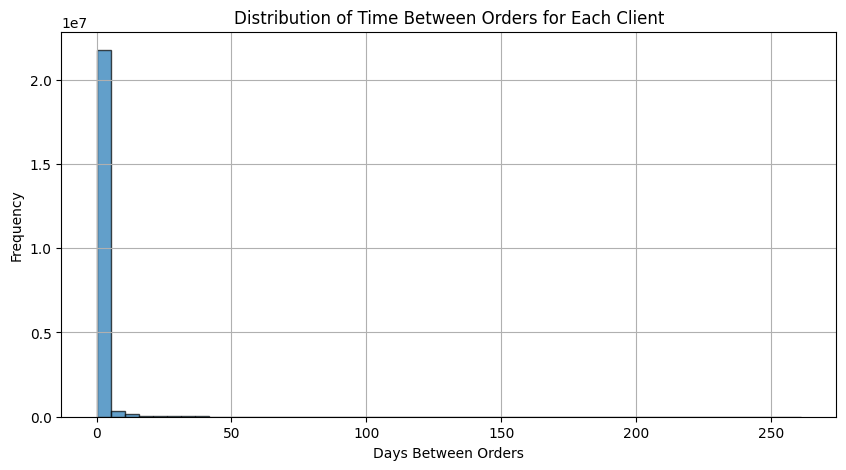

In [24]:
filtered_df = filtered_df.sort_values(by=["client_id", "date_order"])

# Calculate time between orders for each client
filtered_df["time_between_orders"] = (
    filtered_df.groupby("client_id")["date_order"].diff().dt.days
)

# Drop NaN values (first order of each client has no previous order to compare)
time_diffs = filtered_df["time_between_orders"].dropna()

# Plot the distribution of time between orders
plt.figure(figsize=(10, 5))
plt.hist(time_diffs, bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Days Between Orders")
plt.ylabel("Frequency")
plt.title("Distribution of Time Between Orders for Each Client")
plt.grid()
plt.show()

In [31]:
filtered_df["time_between_orders"].mean()

0.8747107070921629

In [38]:
filtered_df[filtered_df["time_between_orders"] > 30]

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,time_between_orders
43823419,2019-02-12,2019-02-12,2676931,6,139.24200,3,at the store,8470,33.0
57397993,2019-07-25,2019-07-25,1650826,6,60.85800,3,by phone,8470,162.0
52464772,2019-06-04,2019-06-04,1109931,37,107.19840,3,at the store,358,40.0
59230236,2019-08-09,2019-08-12,3000534,40,981.65196,81,by phone,5616,32.0
48171124,2019-04-02,2019-04-02,2457377,56,28.48320,3,at the store,5579,63.0
...,...,...,...,...,...,...,...,...,...
58721314,2019-08-07,2019-08-07,2151232,2274440,0.92000,5,at the store,4280,47.0
44932174,2019-03-01,2019-03-01,1088278,2274517,114.06528,41,at the store,10078,57.0
48702739,2019-04-09,2019-04-09,1187054,2274517,21.34170,9,at the store,10078,39.0
54481890,2019-06-25,2019-06-25,1452150,2274517,274.01418,121,at the store,10078,67.0


In [39]:
time_diffs.quantile(0.99)

20.0

In [40]:
time_diffs.max()

261.0

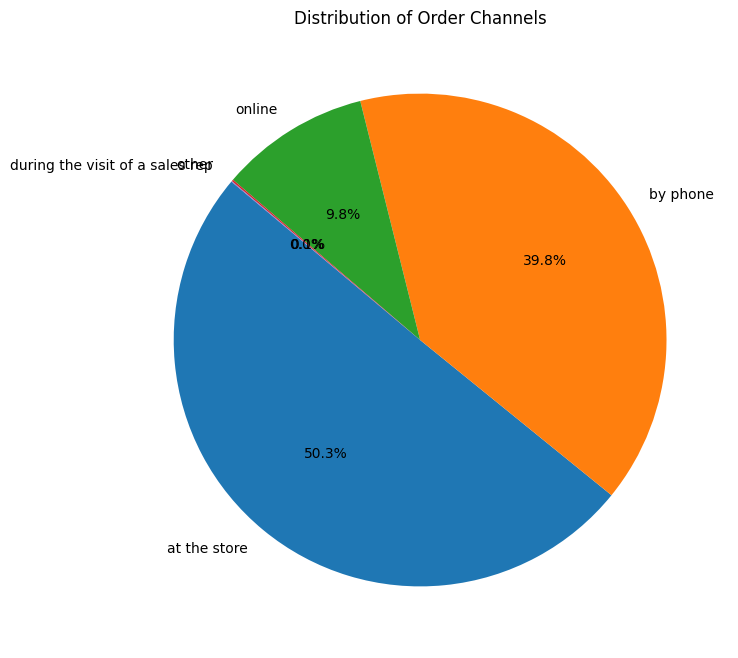

In [43]:
# Calculate the normalized count (percentage) of each category in 'order_channel'
order_channel_counts = filtered_df["order_channel"].value_counts(normalize=True)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    order_channel_counts,
    labels=order_channel_counts.index,
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Distribution of Order Channels")
plt.show()

- Mark customers at churned or not:

In [44]:
import pandas as pd

# Ensure 'date_order' is in datetime format
filtered_df["date_order"] = pd.to_datetime(filtered_df["date_order"])

# Sort by client_id and date_order
filtered_df = filtered_df.sort_values(by=["client_id", "date_order"])

# Calculate the next order date for each customer
filtered_df["next_order_date"] = filtered_df.groupby("client_id")["date_order"].shift(
    -1
)

# Compute the days until the next order
filtered_df["days_until_next_order"] = (
    filtered_df["next_order_date"] - filtered_df["date_order"]
).dt.days

# Define churn: If no order in the next 30 days, mark as churned (1), otherwise 0
filtered_df["churned"] = (filtered_df["days_until_next_order"] > 30) | (
    filtered_df["days_until_next_order"].isna()
)
filtered_df["churned"] = filtered_df["churned"].astype(int)

# Display the first few rows to confirm changes
filtered_df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,time_between_orders,next_order_date,days_until_next_order,churned
41050899,2019-01-10,2019-01-10,3137129,6,0.000000,3,by phone,8470,NaN,2019-01-10,0.0,0
41085327,2019-01-10,2019-01-10,1478345,6,157.666227,121,by phone,8470,0.0,2019-02-12,33.0,1
43823419,2019-02-12,2019-02-12,2676931,6,139.242000,3,at the store,8470,33.0,2019-02-13,1.0,0
43903220,2019-02-13,2019-02-13,50772,6,11.895600,3,at the store,8470,1.0,2019-02-13,0.0,0
43960953,2019-02-13,2019-02-13,891104,6,23.239200,3,at the store,8470,0.0,2019-07-25,162.0,1


In [45]:
filtered_df["churned"].value_counts(normalize=True)

churned
0    0.988565
1    0.011435
Name: proportion, dtype: float64

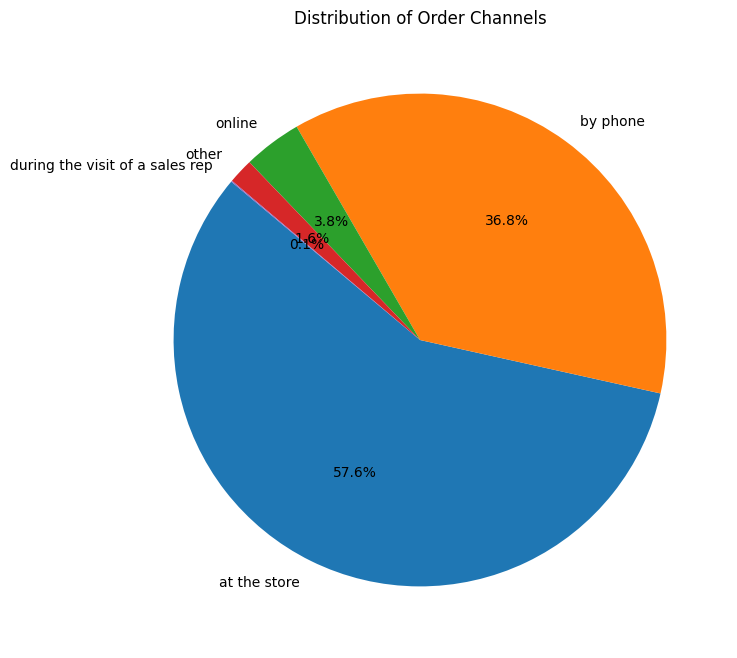

In [48]:
# Calculate the normalized count (percentage) of each category in 'order_channel'
order_channel_counts = filtered_df[filtered_df["churned"] == 1][
    "order_channel"
].value_counts(normalize=True)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    order_channel_counts,
    labels=order_channel_counts.index,
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Distribution of Order Channels")
plt.show()

In [51]:
filtered_df[filtered_df["churned"] == 1]["branch_id"].value_counts(normalize=True)

branch_id
228      0.006443
4280     0.005412
4080     0.005134
1857     0.005007
6179     0.004845
           ...   
516      0.000004
9499     0.000004
4828     0.000004
9187     0.000004
10348    0.000004
Name: proportion, Length: 554, dtype: float64

In [56]:
# Ensure 'date_order' is datetime
filtered_df["date_order"] = pd.to_datetime(filtered_df["date_order"])

# Truncate date to the beginning of each week
filtered_df["week_start"] = filtered_df["date_order"] - pd.to_timedelta(
    filtered_df["date_order"].dt.weekday, unit="D"
)

# Aggregate churned customers per week
churned_per_week = filtered_df.groupby("week_start")["churned"].sum()

# Plot the number of churned customers per week
plt.figure(figsize=(10, 5))
plt.plot(churned_per_week.index, churned_per_week.values, marker="o", linestyle="-")
plt.xlabel("Week")
plt.ylabel("Number of Churned Customers")
plt.title("Number of Churned Customers Per Week")
plt.xticks(rotation=45)
plt.grid()
plt.show()

MemoryError: Unable to allocate 173. MiB for an array with shape (22652906,) and data type int64

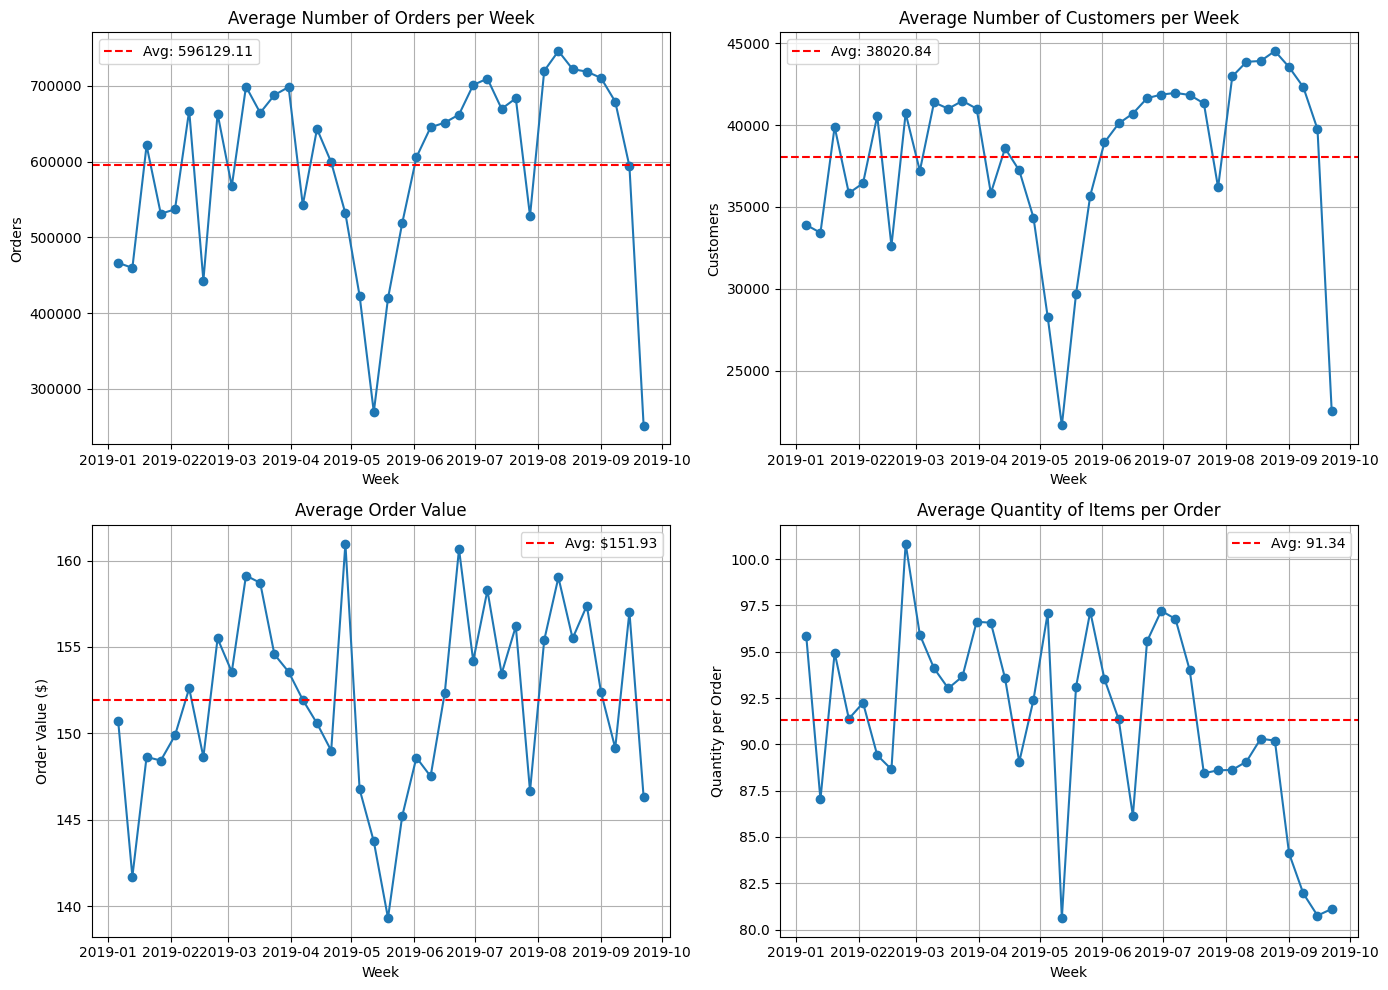

In [41]:
df = filtered_df.copy()

# Group by week
weekly_orders = df.resample("W", on="date_order").size()
weekly_customers = df.resample("W", on="date_order")["client_id"].nunique()
weekly_sales = df.resample("W", on="date_order")["sales_net"].sum()
weekly_quantity = df.resample("W", on="date_order")["quantity"].sum()

# Calculate averages
avg_orders_per_week = weekly_orders.mean()
avg_customers_per_week = weekly_customers.mean()
avg_order_value = (weekly_sales / weekly_orders).mean()
avg_quantity_per_order = (weekly_quantity / weekly_orders).mean()

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Average number of orders per week
axes[0, 0].plot(weekly_orders.index, weekly_orders.values, marker="o", linestyle="-")
axes[0, 0].axhline(
    avg_orders_per_week,
    color="r",
    linestyle="--",
    label=f"Avg: {avg_orders_per_week:.2f}",
)
axes[0, 0].set_title("Average Number of Orders per Week")
axes[0, 0].set_xlabel("Week")
axes[0, 0].set_ylabel("Orders")
axes[0, 0].legend()
axes[0, 0].grid()

# Average number of customers per week
axes[0, 1].plot(
    weekly_customers.index, weekly_customers.values, marker="o", linestyle="-"
)
axes[0, 1].axhline(
    avg_customers_per_week,
    color="r",
    linestyle="--",
    label=f"Avg: {avg_customers_per_week:.2f}",
)
axes[0, 1].set_title("Average Number of Customers per Week")
axes[0, 1].set_xlabel("Week")
axes[0, 1].set_ylabel("Customers")
axes[0, 1].legend()
axes[0, 1].grid()

# Average value of an order
axes[1, 0].plot(
    weekly_sales.index, (weekly_sales / weekly_orders).values, marker="o", linestyle="-"
)
axes[1, 0].axhline(
    avg_order_value, color="r", linestyle="--", label=f"Avg: ${avg_order_value:.2f}"
)
axes[1, 0].set_title("Average Order Value")
axes[1, 0].set_xlabel("Week")
axes[1, 0].set_ylabel("Order Value ($)")
axes[1, 0].legend()
axes[1, 0].grid()

# Average quantity of items in orders
axes[1, 1].plot(
    weekly_quantity.index,
    (weekly_quantity / weekly_orders).values,
    marker="o",
    linestyle="-",
)
axes[1, 1].axhline(
    avg_quantity_per_order,
    color="r",
    linestyle="--",
    label=f"Avg: {avg_quantity_per_order:.2f}",
)
axes[1, 1].set_title("Average Quantity of Items per Order")
axes[1, 1].set_xlabel("Week")
axes[1, 1].set_ylabel("Quantity per Order")
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()